In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#Use inspector to find table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
#Print columns of each table
for col in inspector.get_columns('measurement'):
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
for col in inspector.get_columns('station'):
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [9]:
# Query to retrieve weather data 
query1 = """        
        SELECT
            m.date,
            s.id as station_id,
            s.station,
            s.name,
            m.prcp
        FROM
            measurement as m
        JOIN station as s ON s.station = m.station
        """

In [10]:
#read into df, save to df
conn = engine.connect()
df = pd.read_sql(query1, conn)
conn.close()
df.head()

,date,station_id,station,name,prcp
0,2010-01-01,1,USC00519397,"WAIKIKI 717.2, HI US",0.08
1,2010-01-02,1,USC00519397,"WAIKIKI 717.2, HI US",0.00
2,2010-01-03,1,USC00519397,"WAIKIKI 717.2, HI US",0.00
3,2010-01-04,1,USC00519397,"WAIKIKI 717.2, HI US",0.00
4,2010-01-06,1,USC00519397,"WAIKIKI 717.2, HI US",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
date          19550 non-null object
station_id    19550 non-null int64
station       19550 non-null object
name          19550 non-null object
prcp          18103 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 763.8+ KB


In [12]:
#convert 'date' from object to datetime
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')


In [13]:
#find max date to use in filter
df.date.max()

Timestamp('2017-08-23 00:00:00')

In [14]:
mask = (df.date >= '2016-08-23')
anPrcp = df.loc[mask]

#sort by date
anPrcp = anPrcp.sort_values(by='date', ascending=False)


C:\Users\slapp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


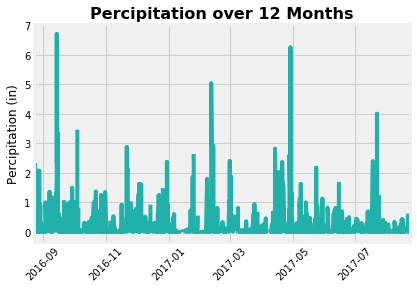

In [15]:
#Plot percipication vs time
plt.plot(anPrcp.date, anPrcp.prcp, color='lightseagreen')
plt.xticks(rotation=45)
plt.title("Percipitation over 12 Months", fontweight = 'bold', fontsize = 16)
plt.ylabel("Percipitation (in)", fontsize = 12)
plt.xlim('2016-08-23', max(anPrcp.date))
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.prcp.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [17]:
# Design a query to show how many stations are available in this dataset?
# List the stations and the counts in descending order.

query2 = """        
        SELECT
            s.id as station_id,
            s.station,
            s.name, 
            count(s.id) as entry_count,
            min(m.tobs) as low_temp,
            avg(m.tobs) as avg_temp,
            max(m.tobs) as high_temp
        FROM
            measurement as m
        JOIN station as s ON s.station = m.station
        GROUP BY s.id
        ORDER BY entry_count DESC
        """

In [18]:

#read into df, save to df
conn = engine.connect()
df = pd.read_sql(query2, conn)
conn.close()
df.head()

,station_id,station,name,entry_count,low_temp,avg_temp,high_temp
0,7,USC00519281,"WAIHEE 837.5, HI US",2772,54.0,71.663781,85.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",2724,56.0,74.553231,87.0
2,2,USC00513117,"KANEOHE 838.1, HI US",2709,59.0,72.689184,85.0
3,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669,56.0,74.543649,85.0
4,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612,58.0,70.915008,84.0


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
df[:1]

,station_id,station,name,entry_count,low_temp,avg_temp,high_temp
0,7,USC00519281,"WAIHEE 837.5, HI US",2772,54.0,71.663781,85.0


In [20]:
# Choose the station with the highest number of temperature observations.
query3 = """
        SELECT
            m.date,
            s.id as station_id,
            s.station,
            s.name, 
            m.tobs
        FROM
            measurement as m
        JOIN station as s ON s.station = m.station
        WHERE
            station_id == 7
        ORDER BY m.date ASC
        """

In [21]:
conn = engine.connect()
df = pd.read_sql(query3, conn)
conn.close()
df.head()

,date,station_id,station,name,tobs
0,2010-01-01,7,USC00519281,"WAIHEE 837.5, HI US",70.0
1,2010-01-02,7,USC00519281,"WAIHEE 837.5, HI US",62.0
2,2010-01-03,7,USC00519281,"WAIHEE 837.5, HI US",74.0
3,2010-01-04,7,USC00519281,"WAIHEE 837.5, HI US",75.0
4,2010-01-05,7,USC00519281,"WAIHEE 837.5, HI US",74.0


In [22]:
#convert 'date' from object to datetime
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')


In [23]:
#Find max date for filtering
max(df.date)

Timestamp('2017-08-18 00:00:00')

In [24]:
#Filter to find data from last year using mask and .loc
mask = (df.date >= '2016-08-18')
station7annual = df.loc[mask]
station7annual.head()
station7annual.sort_values(by='date', ascending = "True")

,date,station_id,station,name,tobs
2415,2016-08-18,7,USC00519281,"WAIHEE 837.5, HI US",80.0
2416,2016-08-19,7,USC00519281,"WAIHEE 837.5, HI US",79.0
2417,2016-08-20,7,USC00519281,"WAIHEE 837.5, HI US",81.0
2418,2016-08-21,7,USC00519281,"WAIHEE 837.5, HI US",79.0
2419,2016-08-22,7,USC00519281,"WAIHEE 837.5, HI US",78.0
...,...,...,...,...,...
2767,2017-08-14,7,USC00519281,"WAIHEE 837.5, HI US",77.0
2768,2017-08-15,7,USC00519281,"WAIHEE 837.5, HI US",77.0
2769,2017-08-16,7,USC00519281,"WAIHEE 837.5, HI US",76.0
2770,2017-08-17,7,USC00519281,"WAIHEE 837.5, HI US",76.0


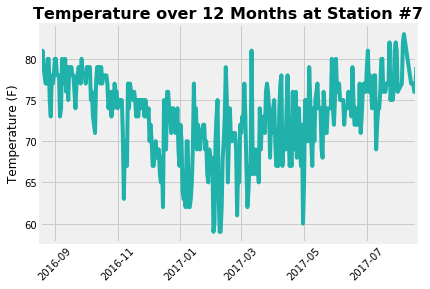

In [25]:
#plot temp vs time
plt.plot(station7annual.date, station7annual.tobs, color = 'lightseagreen')
plt.xticks(rotation=45)
plt.xlim('2016-08-18', max(station7annual.date))
plt.title("Temperature over 12 Months at Station #7", fontweight='bold', fontsize=16)
plt.ylabel("Temperature (F)", fontsize=12)
plt.show()

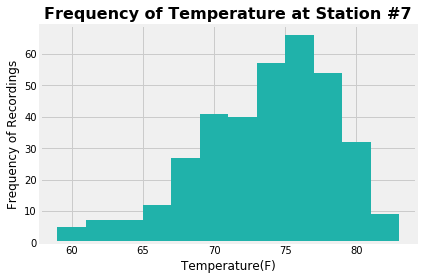

In [26]:
#hist of temps
plt.hist(station7annual.tobs, bins= 12, color= 'lightseagreen')
plt.title('Frequency of Temperature at Station #7', fontweight = 'bold', fontsize = 16)
plt.xlabel('Temperature(F)', fontsize = 12)
plt.ylabel('Frequency of Recordings', fontsize = 12)
plt.show()

## Bonus Challenge Assignment

In [27]:
#Find avg temp for June and December across all years
#Query to find aggs by date

querydates = """
            SELECT
                date,
                min(tobs) as min_temp,
                avg(tobs) as avg_temp,
                max(tobs) as max_temp
            FROM
                measurement
            GROUP BY
                date       
            """
conn = engine.connect()
df = pd.read_sql(querydates, conn)
conn.close()
#convert to date time
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.head()

,date,min_temp,avg_temp,max_temp
0,2010-01-01,65.0,69.714286,75.0
1,2010-01-02,61.0,67.000000,75.0
2,2010-01-03,67.0,74.000000,77.0
3,2010-01-04,72.0,75.000000,76.0
4,2010-01-05,73.0,74.500000,76.0


In [28]:
#Find all rows that are in June using mask and .loc

JunMask = (
        ((df.date >= '2010-06-01') & (df.date<= f'2010-06-30')) |
        ((df.date >= '2011-06-01') & (df.date<= f'2011-06-30')) |
        ((df.date >= '2012-06-01') & (df.date<= f'2012-06-30')) |
        ((df.date >= '2013-06-01') & (df.date<= f'2013-06-30')) |
        ((df.date >= '2014-06-01') & (df.date<= f'2014-06-30')) |
        ((df.date >= '2015-06-01') & (df.date<= f'2015-06-30')) |
        ((df.date >= '2016-06-01') & (df.date<= f'2016-06-30')) |
        ((df.date >= '2017-06-01') & (df.date<= f'2017-06-30')) 
            ) 
JunAggs =df.loc[JunMask]
JunAggs.head()

,date,min_temp,avg_temp,max_temp
151,2010-06-01,69.0,73.555556,78.0
152,2010-06-02,70.0,74.555556,78.0
153,2010-06-03,67.0,74.444444,78.0
154,2010-06-04,68.0,72.888889,76.0
155,2010-06-05,72.0,76.000000,79.0


In [29]:
#Find all rows that are in December using mask and .loc

DecMask = (
        ((df.date >= '2010-12-01') & (df.date<= f'2010-12-31')) |
        ((df.date >= '2011-12-01') & (df.date<= f'2011-12-31')) |
        ((df.date >= '2012-12-01') & (df.date<= f'2012-12-31')) |
        ((df.date >= '2013-12-01') & (df.date<= f'2013-12-31')) |
        ((df.date >= '2014-12-01') & (df.date<= f'2014-12-31')) |
        ((df.date >= '2015-12-01') & (df.date<= f'2015-12-31')) |
        ((df.date >= '2016-12-01') & (df.date<= f'2016-12-31')) |
        ((df.date >= '2017-12-01') & (df.date<= f'2017-12-31')) 
            ) 
DecAggs =df.loc[DecMask]
DecAggs.head()

,date,min_temp,avg_temp,max_temp
334,2010-12-01,70.0,73.125000,78.0
335,2010-12-02,70.0,72.500000,75.0
336,2010-12-03,67.0,71.875000,74.0
337,2010-12-04,72.0,74.857143,78.0
338,2010-12-05,66.0,71.285714,78.0


In [30]:
print(f"June Avg Temp: {JunAggs.avg_temp.mean()}")
print(f"December Avg Temp: {DecAggs.avg_temp.mean()}")



June Avg Temp: 75.01091104497361
December Avg Temp: 71.10533428425134


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

# def daily_normals(date):
#     """Daily Normals.
    
#     Args:
#         date (str): A date string in the format '%m-%d'
        
#     Returns:
#         A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#     """
    
#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
# daily_normals("01-01")

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [37]:
# Plot the daily normals as an area plot with `stacked=False`
